In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
df.shape

(200, 4)

In [17]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
dup = df.isnull().sum()
dup

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [27]:
df.shape

(200, 4)

In [29]:
df.duplicated().sum()

0

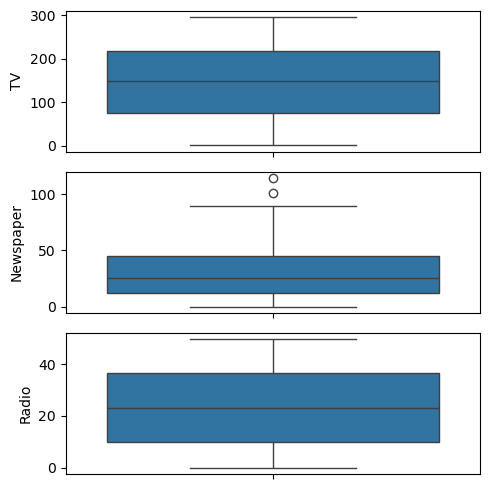

In [81]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

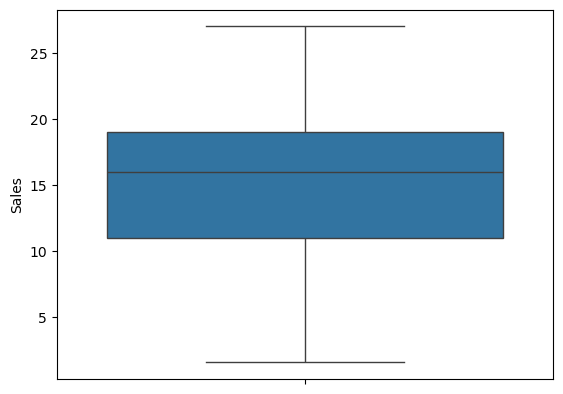

In [85]:
sns.boxplot(df['Sales'])
plt.show()

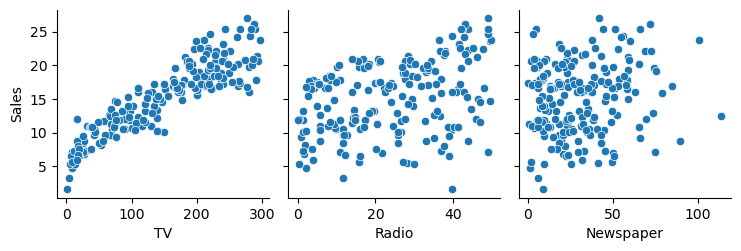

In [31]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars=["Sales"],kind ="scatter")

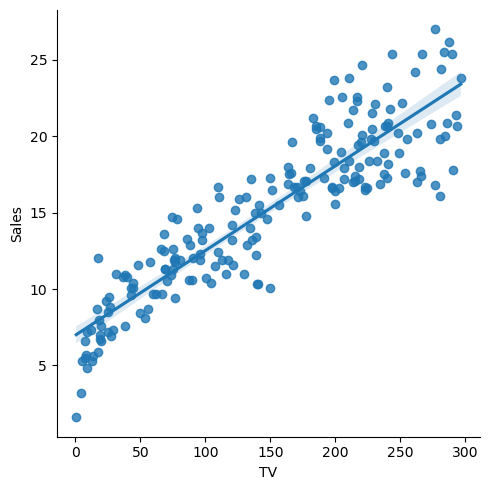

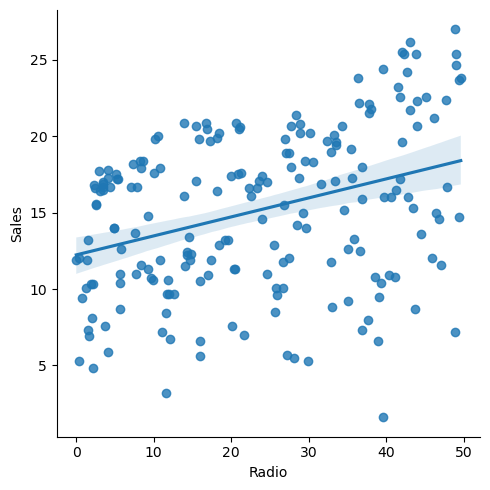

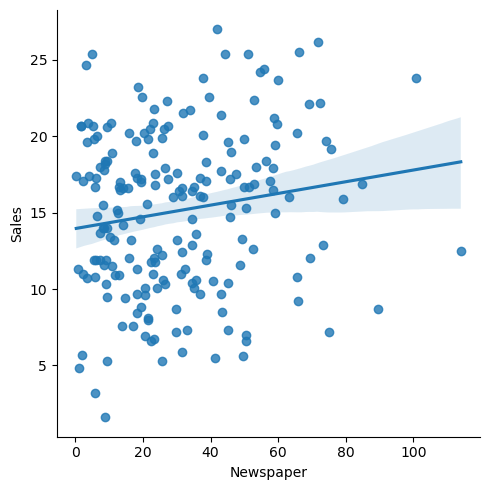

In [37]:
sns.lmplot(x="TV",y="Sales",data=df)
sns.lmplot(x="Radio",y="Sales",data=df)
sns.lmplot(x="Newspaper",y="Sales",data=df)

<Axes: xlabel='Sales', ylabel='Frequency'>

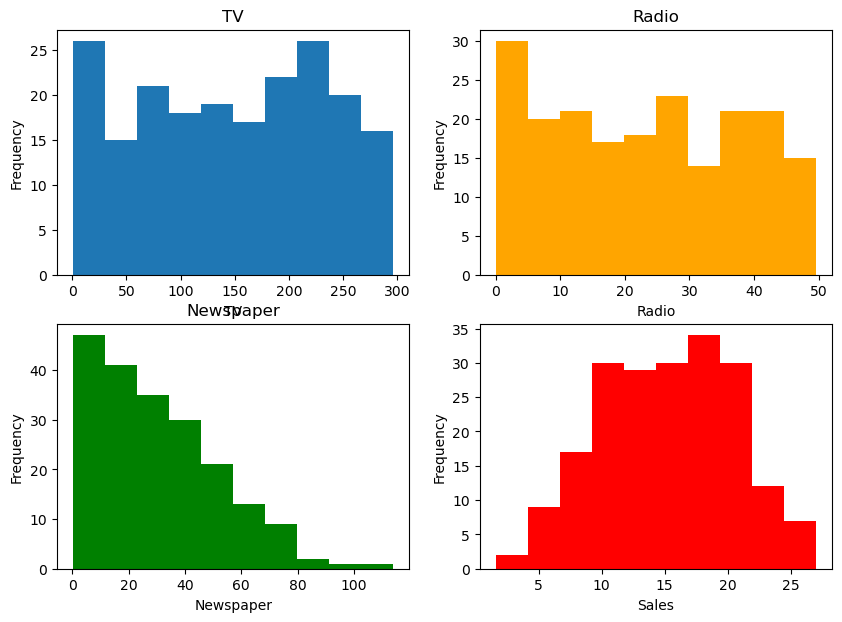

In [79]:
plt.figure(figsize=(10,7))

plt.subplot(221)
df["TV"].plot.hist(bins=10,xlabel="TV")
plt.title("TV")

plt.subplot(222)
df["Radio"].plot.hist(bins=10,color="orange",xlabel="Radio")
plt.title("Radio")

plt.subplot(223)
df["Newspaper"].plot.hist(bins=10,color="green",xlabel="Newspaper")
plt.title("Newspaper")

plt.subplot(224)
df["Sales"].plot.hist(bins=10,color="red",xlabel="Sales")

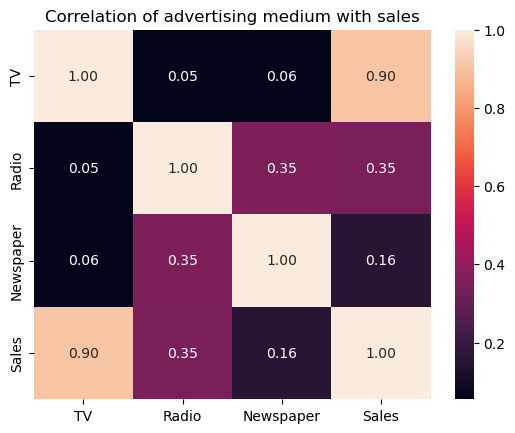

In [95]:
sns.heatmap(df.corr(),annot=True ,fmt=".2f")
plt.title("Correlation of advertising medium with sales")
plt.show()

In [121]:
x=df["TV"]
y=df["Sales"]

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.2,random_state=0)

In [125]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_train type:\n", type(x_train))
print("y_train type:\n", type(y_train))


x_train shape: (140,)
y_train shape: (140,)
x_train type:
 <class 'pandas.core.series.Series'>
y_train type:
 <class 'pandas.core.series.Series'>


In [175]:
import numpy as np
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [185]:
x_test

array([[ 69.2],
       [ 50. ],
       [ 90.4],
       [289.7],
       [170.2],
       [ 56.2],
       [  8.7],
       [240.1],
       [ 23.8],
       [197.6],
       [261.3],
       [ 87.2],
       [156.6],
       [187.8],
       [ 76.4],
       [120.2],
       [265.6],
       [  0.7],
       [ 74.7],
       [213.4],
       [287.6],
       [140.3],
       [175.1],
       [131.7],
       [ 53.5],
       [123.1],
       [165.6],
       [205. ],
       [224. ],
       [ 25.1],
       [ 67.8],
       [198.9],
       [280.7],
       [241.7],
       [ 13.2],
       [ 18.7],
       [ 59.6],
       [180.8],
       [ 68.4],
       [ 25. ]])

In [177]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [179]:
pred = model.predict(x_test)
pred

array([[10.9447418 ],
       [ 9.90287376],
       [12.09513775],
       [22.90994497],
       [16.42540175],
       [10.23931032],
       [ 7.66177222],
       [20.21845255],
       [ 8.48115801],
       [17.91223426],
       [21.36884851],
       [11.92149308],
       [15.6874119 ],
       [17.38044745],
       [11.33544231],
       [13.71220375],
       [21.60218353],
       [ 7.22766054],
       [11.24319358],
       [18.76960482],
       [22.79599065],
       [14.80290935],
       [16.69129516],
       [14.33623929],
       [10.09279762],
       [13.86956924],
       [16.17578754],
       [18.31378756],
       [19.3448028 ],
       [ 8.55170116],
       [10.86877225],
       [17.9827774 ],
       [22.42156933],
       [20.30527489],
       [ 7.90596004],
       [ 8.20441182],
       [10.42380778],
       [17.00059973],
       [10.90133063],
       [ 8.54627477]])

In [181]:
model.coef_

array([[0.05426396]])

In [183]:
model.intercept_

array([7.18967577])

In [189]:
0.05426396*69.2+7.18967577

10.944741802

In [203]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test,pred))

2.5793520408159014

In [205]:
r_squared = r2_score(y_test, pred)
r_squared

0.8006759836401367

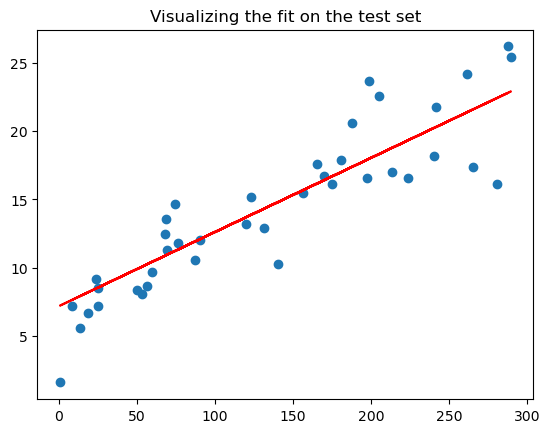

In [213]:
plt.scatter(x_test,y_test)
plt.plot(x_test,pred,"r")
plt.title("Visualizing the fit on the test set")
plt.show()